In [52]:
import pandas as pd
import numpy as np
import trimesh

from scipy.spatial import ConvexHull
from scipy.sparse.linalg import eigsh
import matplotlib.pyplot as plt
import igl

from ghcn_helper import *
from process_laplacian import *
import time


In [46]:
date_start, date_end = "20180101", "20181231"
yearbook = build_yearbook(date_start, date_end, ["TMAX", "TMIN"])
persistent_stations = find_persistent_stations(date_start, date_end, yearbook)
all_stations = find_all_stations(date_start, date_end, yearbook)


Found 4964 persistent stations in date range 20180101-20181231
Found 13985 stations in total in date range 20180101-20181231


In [53]:
df = all_stations


In [15]:
points = df2points(df)
points = points.T
ch = ConvexHull(points)

V = ch.points
F = ch.simplices
mesh = trimesh.Trimesh(vertices=V, faces=F, process=False)
assert mesh.is_watertight
assert mesh.euler_number == 2
mesh.show()
# mesh.export("persistent_stations.obj")


/Users/dwd/anaconda3/lib/python3.6/site-packages/IPython/core/display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


time taken:  0.14852781295776368


(array([1855., 2426., 1914., 1283.,  825.,  466.,  339.,  263.,  193.,
        4421.]),
 array([4.26591499e-08, 1.00383932e-05, 2.00341273e-05, 3.00298614e-05,
        4.00255955e-05, 5.00213296e-05, 6.00170637e-05, 7.00127977e-05,
        8.00085318e-05, 9.00042659e-05, 1.00000000e-04]),
 <a list of 10 Patch objects>)

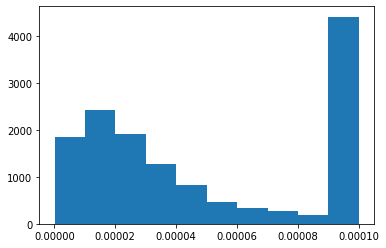

In [20]:
N=10
start = time.time()
for _ in range(N):
    L, M = compute_cotan_laplacian(df)
end = time.time()
print("time taken: ", (end - start)/N)

diag = M.diagonal()
clip_max = 0.0001
diag = np.clip(diag, a_min=0, a_max=clip_max)
# plt.xscale("log")
plt.hist(diag)


In [21]:
laplacian = combine_mass_cotan(L, M)
lmax = compute_lmax(laplacian)
lmax
# WAY TOO BIGGGGGGG!


Successfully converged after 20 steps
Difference between ML @ v and lambda * v:  56.569417585599545


4596912090.849968

In [48]:
df = all_stations


In [54]:
c_df, blacklist = pre_coarsen(df, 0.01, inplace=False)


0-th removed point has nearest dist 3.4906585040383267e-06
1-th removed point has nearest dist 3.913537710904735e-06
2-th removed point has nearest dist 4.182531038924586e-06
3-th removed point has nearest dist 4.581711555617248e-06
4-th removed point has nearest dist 5.088968514885984e-06
5-th removed point has nearest dist 5.235987756069419e-06
6-th removed point has nearest dist 5.551939423647931e-06
7-th removed point has nearest dist 6.30221666684285e-06
8-th removed point has nearest dist 6.768780411488648e-06
9-th removed point has nearest dist 6.790405586072331e-06
10-th removed point has nearest dist 7.3996479122052365e-06
11-th removed point has nearest dist 8.140371981157343e-06
12-th removed point has nearest dist 8.355772973253175e-06
13-th removed point has nearest dist 8.72664625992319e-06
14-th removed point has nearest dist 9.158254427646912e-06
15-th removed point has nearest dist 9.336424498472416e-06
16-th removed point has nearest dist 9.403879009215335e-06
17-th r

In [55]:
L, M = compute_cotan_laplacian(c_df)
laplacian = combine_cotan_mass(L, M)
lmax = compute_lmax(laplacian)
lmax


Loss=2.594591208548991e-13 at step 999
Successfully converged after 1279 steps
Difference between ML @ v and lambda * v:  7.326341824381442


153923012.00628662

In [56]:
c_df


,latitude,longitude
station_id,,
ASN00015643,-22.4518,133.6377
ASN00085296,-37.7481,147.1428
ASN00085280,-38.2094,146.4747
CA007020860,45.4833,-71.9500
CA005030984,52.8167,-97.6167
...,...,...
CI000085743,-38.7500,-72.6330
SU000062640,19.5330,33.3170
USC00252645,42.0628,-102.3172
